## `Objective:`

We have scrapped more than 2000 rows data from different sites like yatra.com, goibibo.com etc. Now we will use this data for building the model.

In [1]:
### importing necessary librabries:-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## `Importing dataset`
- 1.Since data is in form of excel file we have to use pandas read_excel to load the data.
- 2.After loading it is important to check null values in a column or a row
- 3.If it is present then following can be done,

Filling NaN values with mean, median and mode using fillna() method

If Less missing values, we can drop it as well

In [2]:
data = pd.read_csv("Airline_dataSheet.csv")
pd.set_option('display.max_columns', None)
data.head()

,Flight_name,Departure_time,Arrival_time,Source,Destination,Duration,Total_stops,Date_of_journey,Website_name,Price
0,Indigo,21:05,22:05,Hyderabad,Chennai,01h 00m,non-stop,5/30/2022,EaseMyTrip.com,10987
1,Indigo,16:20,17:35,Hyderabad,Chennai,01h 15m,non-stop,5/30/2022,EaseMyTrip.com,6052
2,Indigo,19:00,20:15,Hyderabad,Chennai,01h 15m,non-stop,5/30/2022,EaseMyTrip.com,6052
3,Indigo,5:45,7:00,Hyderabad,Chennai,01h 15m,non-stop,5/30/2022,EaseMyTrip.com,9727
4,Indigo,10:00,11:15,Jaipur,Ahmedabad,01h 15m,non-stop,5/30/2022,EaseMyTrip.com,6371


In [3]:
data.shape

(3798, 10)

In [4]:
data.columns

Index(['Flight_name', 'Departure_time', 'Arrival_time', 'Source',
       'Destination', 'Duration', 'Total_stops', 'Date_of_journey',
       'Website_name', 'Price'],
      dtype='object')

- Size of data set: 3798 records


#### `FEATURES:`
- `Flight_name`: The name of the airline.

- `Date_of_Journey`: The date of the journey

- `Source`: The source from which the service begins.

- `Destination`: The destination where the service ends.

- `Departure_time`: The time when the journey starts from the source.

- `Arrival_Time`: Time of arrival at the destination.

- `Duration`: Total duration of the flight.

- `Total_Stops`: Total stops between the source and destination.

- `Website_name`: Online website name, where you can book your ticket online.
#### `Target:-`

- `Price`: The price of the ticket

In [5]:
## Checking DataType:
data.dtypes

Flight_name        object
Departure_time     object
Arrival_time       object
Source             object
Destination        object
Duration           object
Total_stops        object
Date_of_journey    object
Website_name       object
Price               int64
dtype: object

As we can see that all the  features are object data type except our  target variable Price.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Flight_name      3798 non-null   object
 1   Departure_time   3798 non-null   object
 2   Arrival_time     3798 non-null   object
 3   Source           3798 non-null   object
 4   Destination      3798 non-null   object
 5   Duration         3798 non-null   object
 6   Total_stops      3798 non-null   object
 7   Date_of_journey  3798 non-null   object
 8   Website_name     3798 non-null   object
 9   Price            3798 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 296.8+ KB


Seems there  is no nulls present in my dataset.

In [7]:
## statistical summary of my dataset:
data.describe()

,Price
count,3798.000000
mean,15726.420484
std,6091.536745
min,3539.000000
25%,11194.000000
50%,14881.000000
75%,19066.000000
max,43928.000000


As we could see that our dataset having all object data  type data. So that's why we are unable  to get their statistical summary. 

As we can see that the minimum price of any Airline is 3549  inr and Max price of any airline ticket is 43928. There is big differece we can see. We will take care  of it. It may be possible that our dataset contains outliers. We will see that in further steps.

In [8]:
## checking nulls:
data.isna().sum()

Flight_name        0
Departure_time     0
Arrival_time       0
Source             0
Destination        0
Duration           0
Total_stops        0
Date_of_journey    0
Website_name       0
Price              0
dtype: int64

There is no nulls present in my dataset.

In [9]:
data

,Flight_name,Departure_time,Arrival_time,Source,Destination,Duration,Total_stops,Date_of_journey,Website_name,Price
0,Indigo,21:05,22:05,Hyderabad,Chennai,01h 00m,non-stop,5/30/2022,EaseMyTrip.com,10987
1,Indigo,16:20,17:35,Hyderabad,Chennai,01h 15m,non-stop,5/30/2022,EaseMyTrip.com,6052
2,Indigo,19:00,20:15,Hyderabad,Chennai,01h 15m,non-stop,5/30/2022,EaseMyTrip.com,6052
3,Indigo,5:45,7:00,Hyderabad,Chennai,01h 15m,non-stop,5/30/2022,EaseMyTrip.com,9727
4,Indigo,10:00,11:15,Jaipur,Ahmedabad,01h 15m,non-stop,5/30/2022,EaseMyTrip.com,6371
...,...,...,...,...,...,...,...,...,...,...
3793,Vistara,7:00,16:55,Chennai,New Delhi,9h 55m,1 Stop,5/30/2022,Yatra.com,16333
3794,IndiGo,12:40,22:35,Mumbai,Guwahati,9h 55m,1 Stop,5/30/2022,Yatra.com,9628
3795,Vistara,22:45,08:40\n,Mumbai,Kochi,9h 55m,1 Stop,5/31/2022,Yatra.com,17485
3796,IndiGo,10:20,19:25,Lucknow,Kolkata,9h 5m,2 stops - PAT IXR,5/31/2022,Flipkart.com,8182


## Pre-Processing:-

From description we can see that Date_of_Journey is a object data type,\ Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

.dt.day method will extract only day of that date\ *.dt.month method will extract only month of that date

In [10]:
#data["Journey_day"] = pd.to_datetime(data.Date_of_journey, format="%d/%m/%Y").dt.day
#data["Journey_month"] = pd.to_datetime(data["Date_of_journey"], format = "%d/%m/%Y").dt.month

Journey_day=[]
for i in data.Date_of_journey:
    Journey_day.append(i.split("/")[1])
Journey_month=[]
for i in data.Date_of_journey:
    Journey_month.append(i.split("/")[0])

In [11]:
data['Journey_day']=Journey_day
data['Journey_month']=Journey_month

In [12]:
data['Journey_month'].value_counts()

5    3798
Name: Journey_month, dtype: int64

we will not add journey_month and journey_year in our dataset. Because we have only may 2022 data available. It will not add any value in my prediction.

In [14]:
data.drop('Journey_month',axis=1,inplace=True)

In [15]:
data.head()

,Flight_name,Departure_time,Arrival_time,Source,Destination,Duration,Total_stops,Date_of_journey,Website_name,Price,Journey_day
0,Indigo,21:05,22:05,Hyderabad,Chennai,01h 00m,non-stop,5/30/2022,EaseMyTrip.com,10987,30
1,Indigo,16:20,17:35,Hyderabad,Chennai,01h 15m,non-stop,5/30/2022,EaseMyTrip.com,6052,30
2,Indigo,19:00,20:15,Hyderabad,Chennai,01h 15m,non-stop,5/30/2022,EaseMyTrip.com,6052,30
3,Indigo,5:45,7:00,Hyderabad,Chennai,01h 15m,non-stop,5/30/2022,EaseMyTrip.com,9727,30
4,Indigo,10:00,11:15,Jaipur,Ahmedabad,01h 15m,non-stop,5/30/2022,EaseMyTrip.com,6371,30


In [16]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
## We will not extract Journey year here, because we have only one year data available right now
data.drop(["Date_of_journey"], axis = 1, inplace = True)

In [17]:
### checking the value count:
for i in data.columns:
    if data[i].dtypes=='object':
        print(i)
        print(data[i].value_counts())
        print("\n")

Flight_name
Vistara          1311
IndiGo            804
Air India         631
SpiceJet          322
Indigo            217
Go First          199
Air Asia          129
GO FIRST          128
AirAsia            32
AirAsia I.         23
Multi-Airline       2
Name: Flight_name, dtype: int64


Departure_time
7:00     74
19:45    60
17:35    59
6:00     59
20:30    49
         ..
0:45      1
19:05     1
3:10      1
23:25     1
16:25     1
Name: Departure_time, Length: 247, dtype: int64


Arrival_time
21:20      60
8:55       60
14:05      56
12:30      53
22:45      52
           ..
22:30\n     1
01:40\n     1
1:10        1
09:25\n     1
23:05\n     1
Name: Arrival_time, Length: 396, dtype: int64


Source
New Delhi    1013
Mumbai        583
Delhi         363
Kolkata       321
Chennai       320
Ahmedabad     278
Hyderabad     241
Banglore      185
Bangalore     132
Srinagar       90
Kochi          89
Guwahati       65
Jaipur         58
Lucknow        50
Amritsar       10
Name: Source, dtype: in

## Observation:-
- We see that in Airline_name feature, Air Asia, AirAsia, AirAsia I. flights are different name of Air Asia flight. So we will convert them in one as Air Asia.
- Also we see that Total stops feature are showing different name in similar stops . We have to handle them also.

## `Total_stops:`

In [18]:
for i in data.Total_stops:
    for j in i:
        if j=="1":
            data['Total_stops']=data['Total_stops'].replace(i,"1-stop")
        elif j=="2":
            data['Total_stops']=data['Total_stops'].replace(i,"2-stops")
        elif j=="3":
            data['Total_stops']=data['Total_stops'].replace(i,"3-stops")
        elif j in ["n","N"]:
            data['Total_stops']=data['Total_stops'].replace(i,"Non-stop")
        

In [19]:
data.Total_stops.value_counts()

1-stop      2657
Non-stop     588
2-stops      528
3-stops       25
Name: Total_stops, dtype: int64

## Airline:-

In [20]:
for i in data.Flight_name:
    if i in ['AirAsia','AirAsia I.']:
        data['Flight_name']=data['Flight_name'].replace(i,"Air Asia")
data.Flight_name.value_counts()

Vistara          1311
IndiGo            804
Air India         631
SpiceJet          322
Indigo            217
Go First          199
Air Asia          184
GO FIRST          128
Multi-Airline       2
Name: Flight_name, dtype: int64

# `EDA:`

## Checking Duplicates:

In [21]:
data.duplicated().sum()

364

As we can see that our data set having 364 duplicates entries. We have to drop these duplicates, otherwise our model will become biased.

#### dropping duplicates:-

In [22]:
data.drop_duplicates(inplace=True)

In [23]:
## checking new shape:-
data.shape

(3434, 10)

## Visualization:-

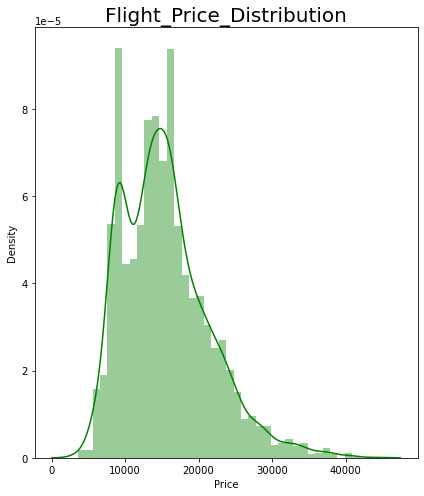

In [24]:
### Let's visulaize our target first:
plt.figure(figsize=(6,7))
sns.distplot(data['Price'], kde=True,color='green')
plt.title('Flight_Price_Distribution',fontsize=20)
plt.tight_layout()

- As we can see in the above distribution of our target variable i.e. price, it seems little right skewed. It may be possible that there are some ourliers present in my dataset. 
- If we ignore them our target varibale seems bell curved.

## Flight_Name/ Airline_Name:

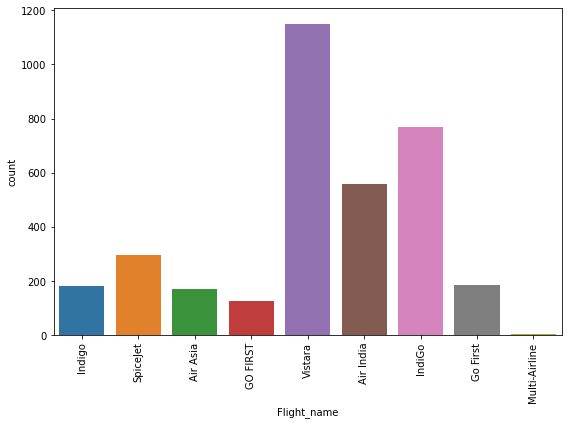

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(data['Flight_name'])
plt.xticks(rotation=90)
plt.tight_layout()

- There are highest count of flights for Vistara Airways Airlines.
- Air_Asia, Air_Asia_I, Airasia Airlines is actually one Airline. so We include all of them and will convert them with AirAsia.

## Source:-

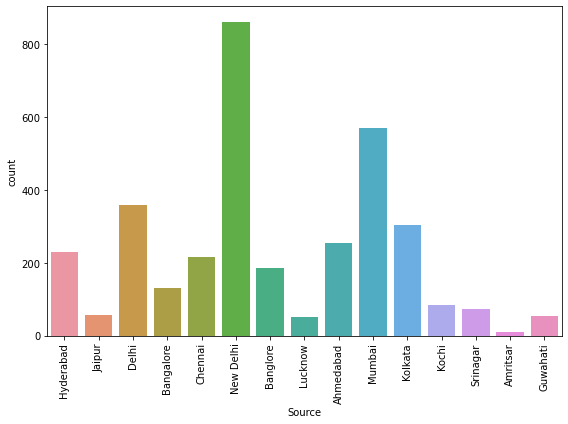

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(data['Source'])
plt.xticks(rotation=90)
plt.tight_layout()

- As we can see that most of the flights are taking off from New delhi.
- there are least number of flghts are taking off from Amritsar.

## Destination

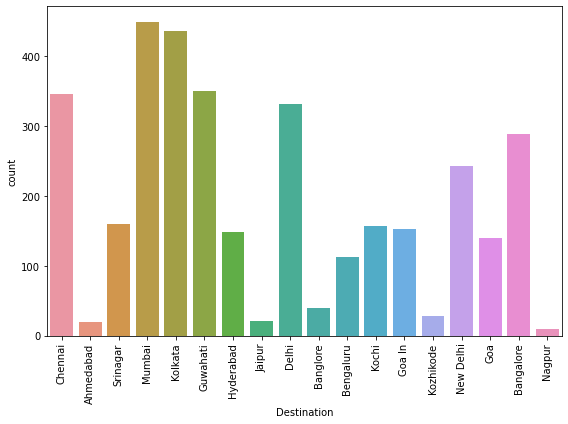

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(data['Destination'])
plt.xticks(rotation=90)
plt.tight_layout()

- mumbai & kolkata are most of the flight's destination.
- Ahmedabad & Nagpur are least flight's destination.

## Total_stops:-

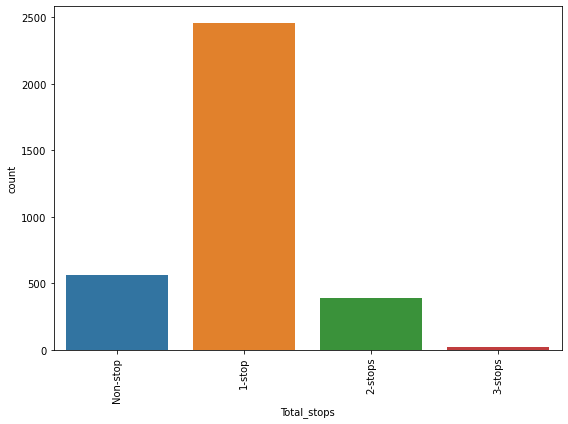

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(data['Total_stops'])
plt.xticks(rotation=90)
plt.tight_layout()

- Most of the flights are taking atleast 1 stops during the journey.
- There is minimum number of flights are taking 3-stops.

## Relation between Total_Stops and Price

<Figure size 720x648 with 0 Axes>

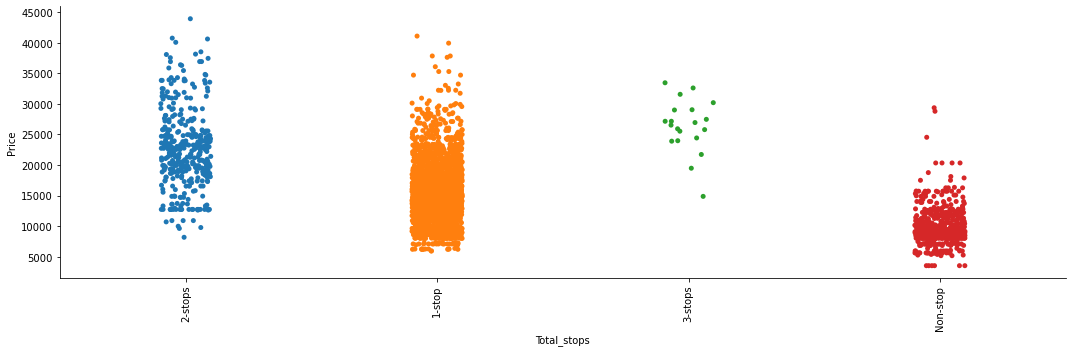

In [29]:
plt.figure(figsize=(10,9))
sns.catplot(x='Total_stops',y='Price',data=data.sort_values('Price',ascending=False),height=5,aspect=3)
plt.xticks(rotation=90)
plt.tight_layout()

- We can see that `Non-Stop` flights price are less as compare to others.
- If a flight takes `2-stops` during the journey, having highest price of flights.
- if flight takes `1-stop` during the journey, the price of the flights falling between median range.

## `Flights_name vs Price`:

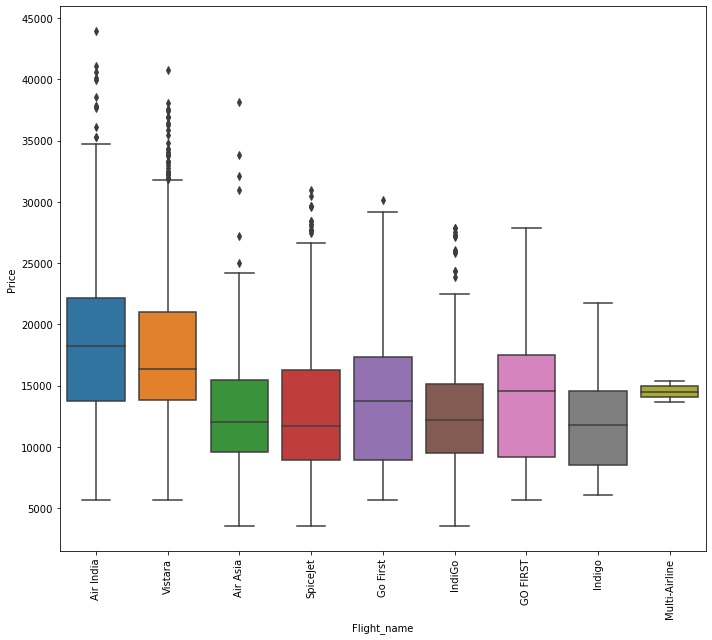

In [30]:
plt.figure(figsize=(10,9))
sns.boxplot(x='Flight_name',y='Price',data=data.sort_values('Price',ascending=False))
plt.xticks(rotation=90)
plt.tight_layout()

- `Air India` airline having hightest prices among all of them.
- `Indigo`,`Spicejet`,`Air Asia` airline haiving least prices amongh all of them.

## Source vs Price:

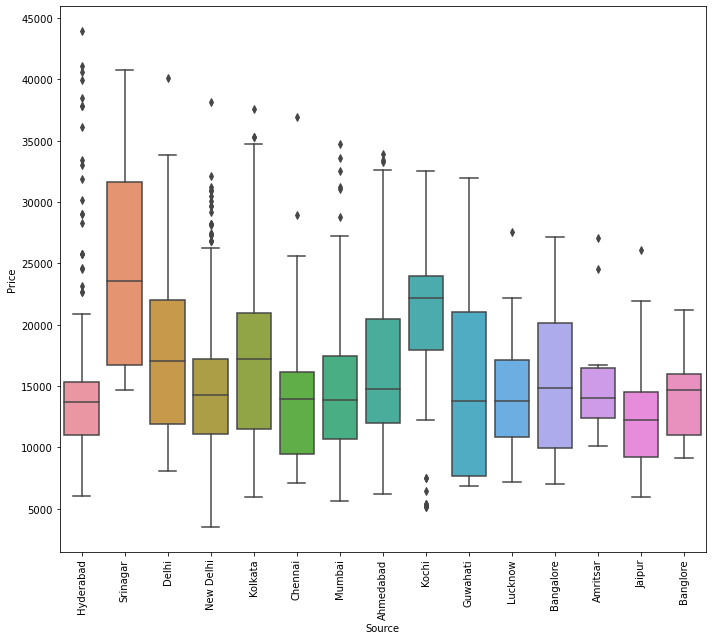

In [31]:
plt.figure(figsize=(10,9))
sns.boxplot(x='Source',y='Price',data=data.sort_values('Price',ascending=False))
plt.xticks(rotation=90)
plt.tight_layout()

## Destination Vs Price:

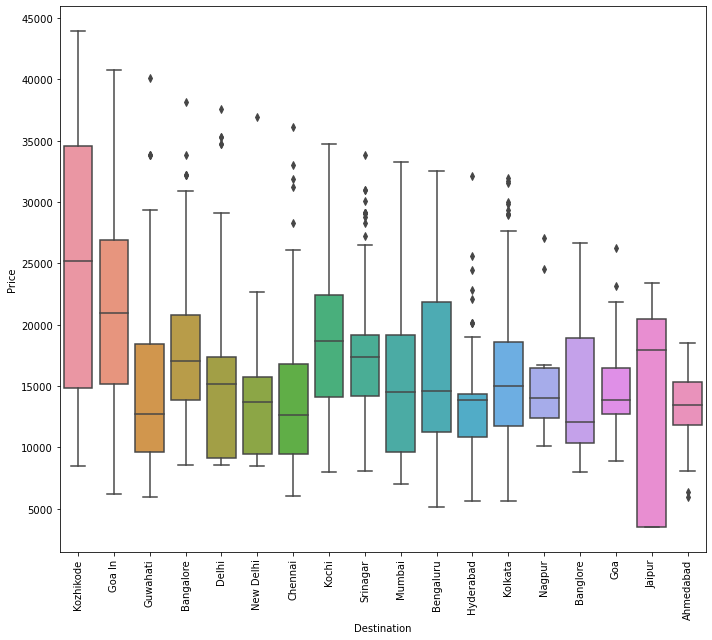

In [32]:
plt.figure(figsize=(10,9))
sns.boxplot(x='Destination',y='Price',data=data.sort_values('Price',ascending=False))
plt.xticks(rotation=90)
plt.tight_layout()

## Cleaning Data:-

we will extract hours and minutes from duration feature and extract some meaning ful information from it.

In [33]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [34]:
# Adding duration_hours and duration_mins list to train_data dataframe

data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins

In [35]:
data

,Flight_name,Departure_time,Arrival_time,Source,Destination,Duration,Total_stops,Website_name,Price,Journey_day,Duration_hours,Duration_mins
0,Indigo,21:05,22:05,Hyderabad,Chennai,01h 00m,Non-stop,EaseMyTrip.com,10987,30,1,0
1,Indigo,16:20,17:35,Hyderabad,Chennai,01h 15m,Non-stop,EaseMyTrip.com,6052,30,1,15
2,Indigo,19:00,20:15,Hyderabad,Chennai,01h 15m,Non-stop,EaseMyTrip.com,6052,30,1,15
3,Indigo,5:45,7:00,Hyderabad,Chennai,01h 15m,Non-stop,EaseMyTrip.com,9727,30,1,15
4,Indigo,10:00,11:15,Jaipur,Ahmedabad,01h 15m,Non-stop,EaseMyTrip.com,6371,30,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...
3793,Vistara,7:00,16:55,Chennai,New Delhi,9h 55m,1-stop,Yatra.com,16333,30,9,55
3794,IndiGo,12:40,22:35,Mumbai,Guwahati,9h 55m,1-stop,Yatra.com,9628,30,9,55
3795,Vistara,22:45,08:40\n,Mumbai,Kochi,9h 55m,1-stop,Yatra.com,17485,31,9,55
3796,IndiGo,10:20,19:25,Lucknow,Kolkata,9h 5m,2-stops,Flipkart.com,8182,31,9,5


In [36]:
## checking value counts:-
data.Duration_hours.value_counts()

2     387
6     266
5     259
7     237
9     179
8     173
1     151
11    135
10    132
4     131
12    125
16    110
13    100
14     99
26     88
15     86
22     82
25     82
23     80
17     71
24     68
19     60
20     57
18     57
21     55
27     55
3      40
28     22
29     17
30      8
36      6
31      5
0       3
42      2
41      1
37      1
50      1
40      1
38      1
47      1
Name: Duration_hours, dtype: int64

In [37]:
## checking value counts:-
data.Duration_mins.value_counts()

0     1460
15     218
50     216
5      193
10     188
20     185
45     182
25     173
30     172
35     158
55     154
40     135
Name: Duration_mins, dtype: int64

Everything is alright now.... let's moving ahead:-

## Arrival time:-

let's extract some meaningful information from Arrival time feature:-

In [38]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
data['Arrival_Time_Hour']=pd.to_datetime(data.Arrival_time).dt.hour

    

# Extracting Minutes
data['Arrival_Time_Minute']=pd.to_datetime(data.Arrival_time).dt.minute



In [39]:
data.head()

,Flight_name,Departure_time,Arrival_time,Source,Destination,Duration,Total_stops,Website_name,Price,Journey_day,Duration_hours,Duration_mins,Arrival_Time_Hour,Arrival_Time_Minute
0,Indigo,21:05,22:05,Hyderabad,Chennai,01h 00m,Non-stop,EaseMyTrip.com,10987,30,1,0,22,5
1,Indigo,16:20,17:35,Hyderabad,Chennai,01h 15m,Non-stop,EaseMyTrip.com,6052,30,1,15,17,35
2,Indigo,19:00,20:15,Hyderabad,Chennai,01h 15m,Non-stop,EaseMyTrip.com,6052,30,1,15,20,15
3,Indigo,5:45,7:00,Hyderabad,Chennai,01h 15m,Non-stop,EaseMyTrip.com,9727,30,1,15,7,0
4,Indigo,10:00,11:15,Jaipur,Ahmedabad,01h 15m,Non-stop,EaseMyTrip.com,6371,30,1,15,11,15


## Departure_time:-

In [41]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Departure_Time

# Extracting Hours
data['Departure_Time_Hour']=pd.to_datetime(data.Departure_time).dt.hour

    

# Extracting Minutes
data['Departure_Time_Minute']=pd.to_datetime(data.Departure_time).dt.minute


In [42]:
data.head()

,Flight_name,Departure_time,Arrival_time,Source,Destination,Duration,Total_stops,Website_name,Price,Journey_day,Duration_hours,Duration_mins,Arrival_Time_Hour,Arrival_Time_Minute,Departure_Time_Hour,Departure_Time_Minute
0,Indigo,21:05,22:05,Hyderabad,Chennai,01h 00m,Non-stop,EaseMyTrip.com,10987,30,1,0,22,5,21,5
1,Indigo,16:20,17:35,Hyderabad,Chennai,01h 15m,Non-stop,EaseMyTrip.com,6052,30,1,15,17,35,16,20
2,Indigo,19:00,20:15,Hyderabad,Chennai,01h 15m,Non-stop,EaseMyTrip.com,6052,30,1,15,20,15,19,0
3,Indigo,5:45,7:00,Hyderabad,Chennai,01h 15m,Non-stop,EaseMyTrip.com,9727,30,1,15,7,0,5,45
4,Indigo,10:00,11:15,Jaipur,Ahmedabad,01h 15m,Non-stop,EaseMyTrip.com,6371,30,1,15,11,15,10,0


### Dropping unwanted  columns now:-

In [44]:
data.drop(columns=['Departure_time','Arrival_time','Duration'],axis=1,inplace=True)

## Website_name:-

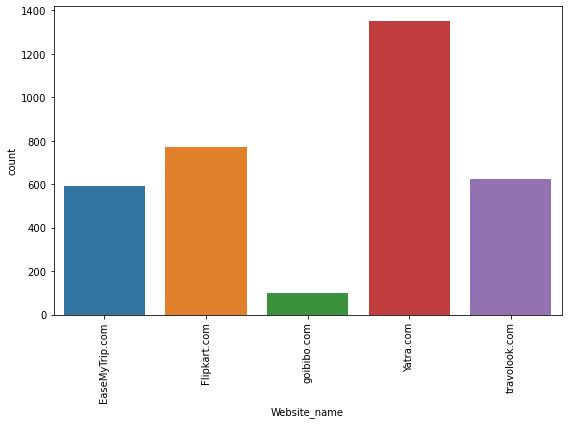

In [45]:
plt.figure(figsize=(8,6))
sns.countplot(data['Website_name'])
plt.xticks(rotation=90)
plt.tight_layout()

- Most of the data scrapped from Yatra.com website.
- goibibo.com websties datacount is least here.

## `Website_name VS Price:-`

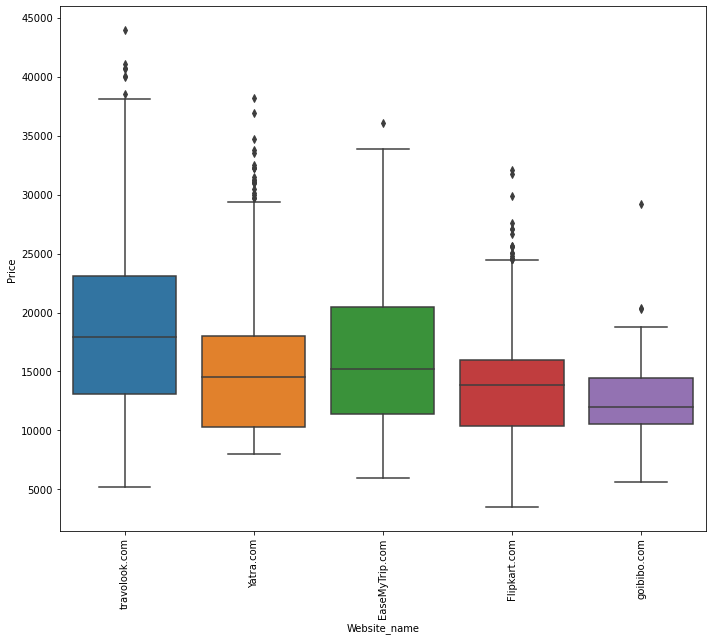

In [46]:
plt.figure(figsize=(10,9))
sns.boxplot(x='Website_name',y='Price',data=data.sort_values('Price',ascending=False))
plt.xticks(rotation=90)
plt.tight_layout()

- travolook.com websites having highest price of domestic flights.
- goibibo.com websites having least prices of domestic flights.

## `Checking distribution of New Features.`

## Journey_day:-

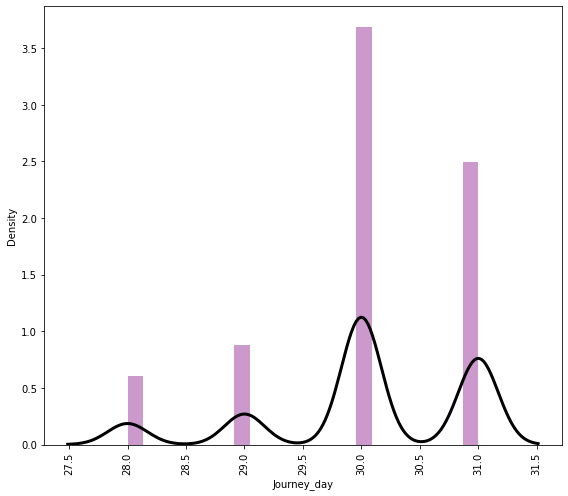

In [48]:
plt.figure(figsize=(8,7))
sns.distplot(data['Journey_day'],color='purple',kde_kws={"color": "k", "lw": 3, "label": "KDE"})
plt.xticks(rotation=90)
plt.tight_layout()

## `Journey_day Vs Price:-`

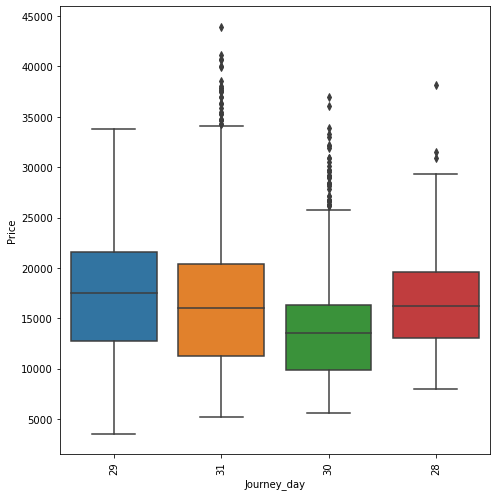

In [51]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Journey_day',y='Price',data=data.sort_values('Price',ascending=True))
plt.xticks(rotation=90)
plt.tight_layout()

- 29th may and 31th may we can find the highest price of domestic flights.

## Duration_hours:-

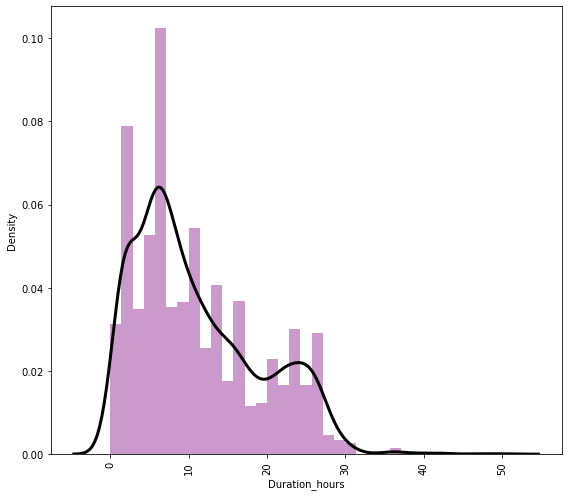

In [53]:
plt.figure(figsize=(8,7))
sns.distplot(data['Duration_hours'],color='purple',kde_kws={"color": "k", "lw": 3, "label": "KDE"})
plt.xticks(rotation=90)
plt.tight_layout()

- Maximum flights take 1 to 10 hours during the  jorney.
- There are least number of flights take more the 30 hours during the  journey.

## `Duration_hours Vs Price:`

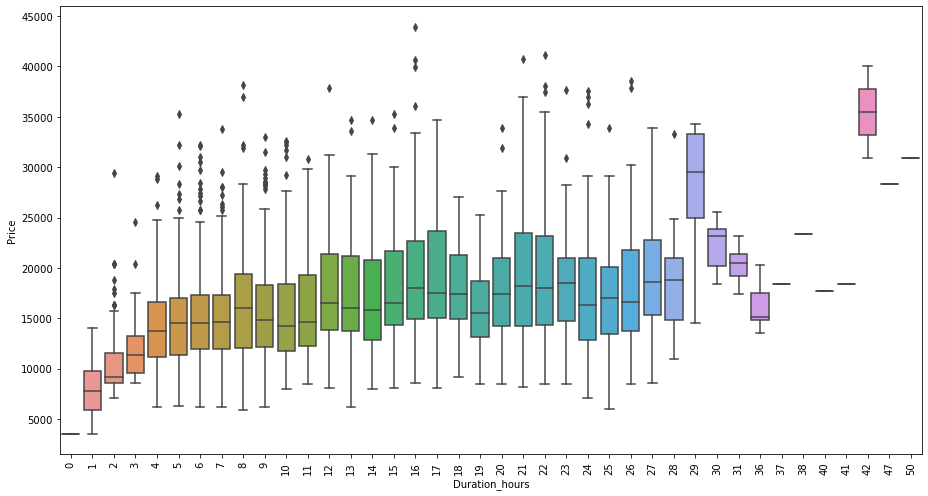

In [56]:
plt.figure(figsize=(13,7))
sns.boxplot(x='Duration_hours',y='Price',data=data.sort_values('Price',ascending=True))
plt.xticks(rotation=90)
plt.tight_layout()

- As we can see that as number of duration hours increases the price are also increases. There are tight relation duration_hours and Price.

## Duration_mins:-

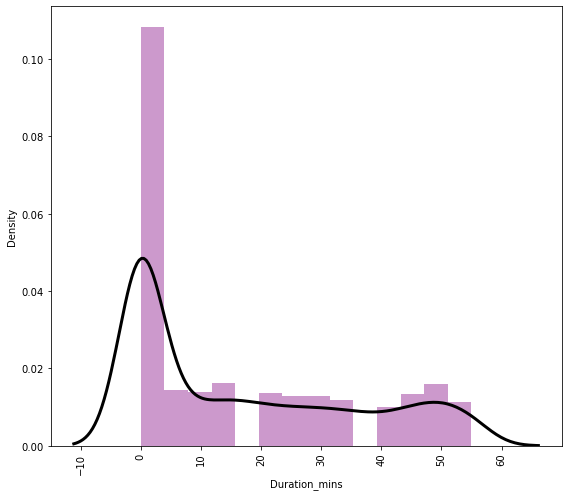

In [57]:
plt.figure(figsize=(8,7))
sns.distplot(data['Duration_mins'],color='purple',kde_kws={"color": "k", "lw": 3, "label": "KDE"})
plt.xticks(rotation=90)
plt.tight_layout()

## `Duration_mins Vs price:-`

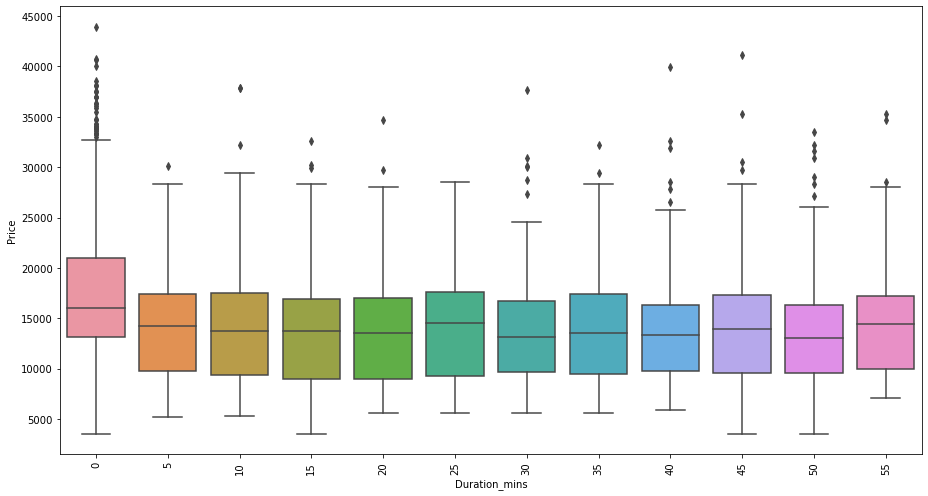

In [58]:
plt.figure(figsize=(13,7))
sns.boxplot(x='Duration_mins',y='Price',data=data.sort_values('Price',ascending=True))
plt.xticks(rotation=90)
plt.tight_layout()

- There are minimum relation between Duration_mins with price.

## Arrival_Time_Hour:-

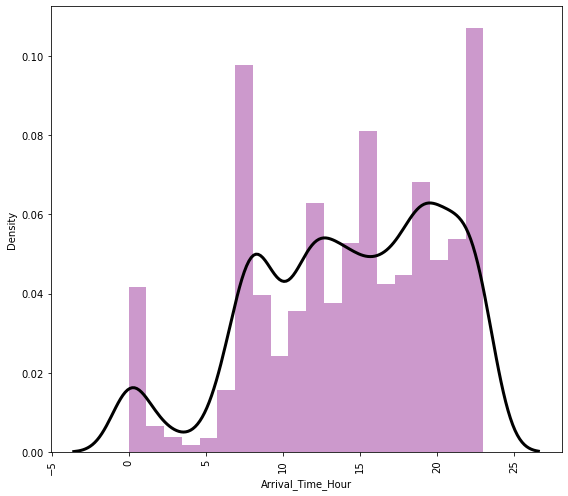

In [59]:
plt.figure(figsize=(8,7))
sns.distplot(data['Arrival_Time_Hour'],color='purple',kde_kws={"color": "k", "lw": 3, "label": "KDE"})
plt.xticks(rotation=90)
plt.tight_layout()

- Most of the flights are take off between 8 AM to 24  PM.
- There are least number of flights are take off between 1 to 7 AM.

## `Arrival_Time_Hour VS PRice`

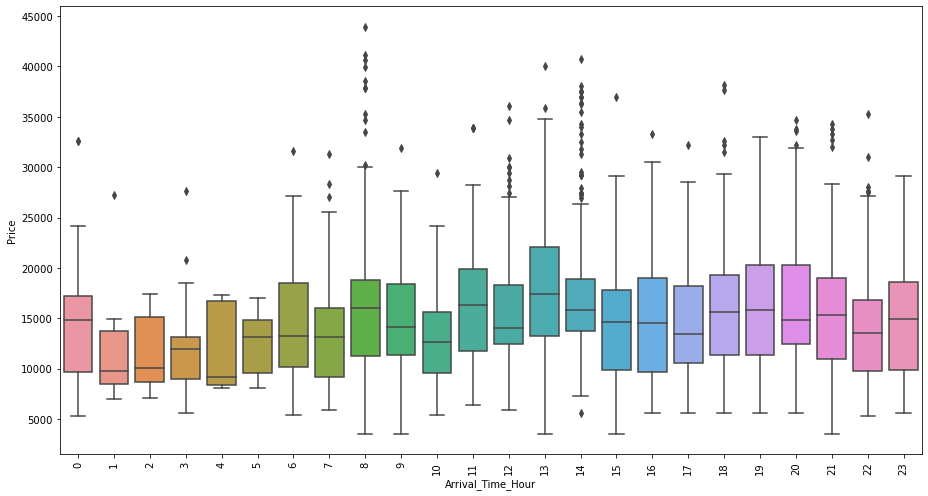

In [60]:
plt.figure(figsize=(13,7))
sns.boxplot(x='Arrival_Time_Hour',y='Price',data=data.sort_values('Price',ascending=True))
plt.xticks(rotation=90)
plt.tight_layout()

- There are uneven relation between Arrival_Time_hour and price.

## Departure_Time_Hour:

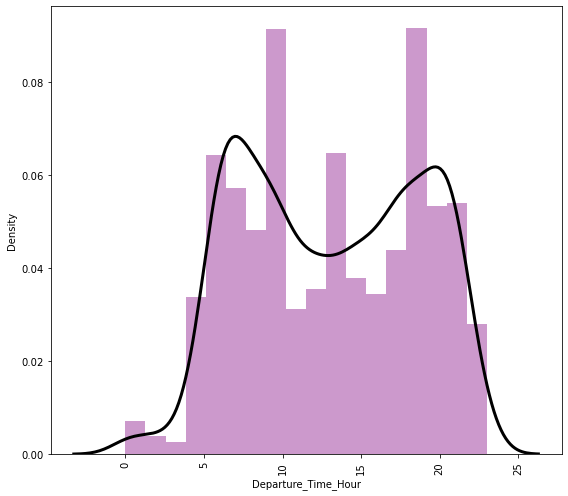

In [61]:
plt.figure(figsize=(8,7))
sns.distplot(data['Departure_Time_Hour'],color='purple',kde_kws={"color": "k", "lw": 3, "label": "KDE"})
plt.xticks(rotation=90)
plt.tight_layout()

## `Departure_Time_Hour VS Price`

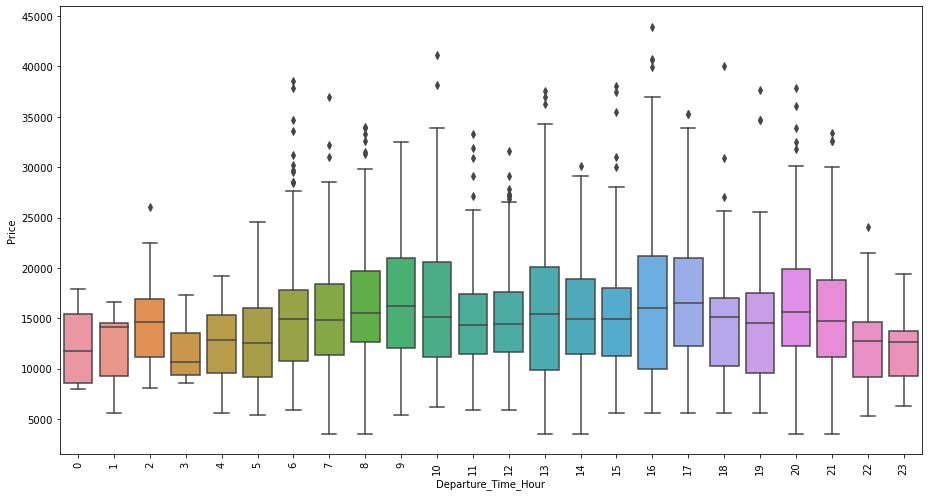

In [62]:
plt.figure(figsize=(13,7))
sns.boxplot(x='Departure_Time_Hour',y='Price',data=data.sort_values('Price',ascending=True))
plt.xticks(rotation=90)
plt.tight_layout()

## `Checking Outliers:-`

In [65]:
data.head()

,Flight_name,Source,Destination,Total_stops,Website_name,Price,Journey_day,Duration_hours,Duration_mins,Arrival_Time_Hour,Arrival_Time_Minute,Departure_Time_Hour,Departure_Time_Minute
0,Indigo,Hyderabad,Chennai,Non-stop,EaseMyTrip.com,10987,30,1,0,22,5,21,5
1,Indigo,Hyderabad,Chennai,Non-stop,EaseMyTrip.com,6052,30,1,15,17,35,16,20
2,Indigo,Hyderabad,Chennai,Non-stop,EaseMyTrip.com,6052,30,1,15,20,15,19,0
3,Indigo,Hyderabad,Chennai,Non-stop,EaseMyTrip.com,9727,30,1,15,7,0,5,45
4,Indigo,Jaipur,Ahmedabad,Non-stop,EaseMyTrip.com,6371,30,1,15,11,15,10,0


In [69]:
## making integer of features:
data['Journey_day']=data.Journey_day.astype(int)
data['Duration_hours']=data.Duration_hours.astype(int)
data['Duration_mins']=data.Duration_mins.astype(int)
data['Arrival_Time_Hour']=data.Arrival_Time_Hour.astype(int)
data['Arrival_Time_Minute']=data.Arrival_Time_Minute.astype(int)
data['Departure_Time_Hour']=data.Departure_Time_Hour.astype(int)
data['Departure_Time_Minute']=data.Departure_Time_Minute.astype(int)

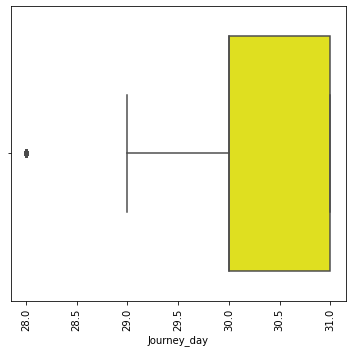

In [70]:
plt.figure(figsize=(5,5))
sns.boxplot(data['Journey_day'],color='yellow')
plt.xticks(rotation=90)
plt.tight_layout()

- We can see only one outlier here.

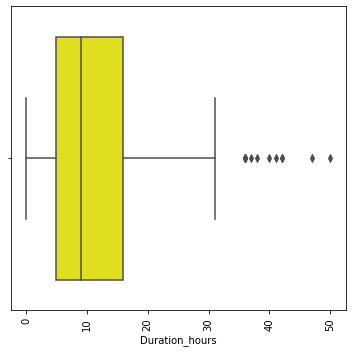

In [71]:
plt.figure(figsize=(5,5))
sns.boxplot(data['Duration_hours'],color='yellow')
plt.xticks(rotation=90)
plt.tight_layout()

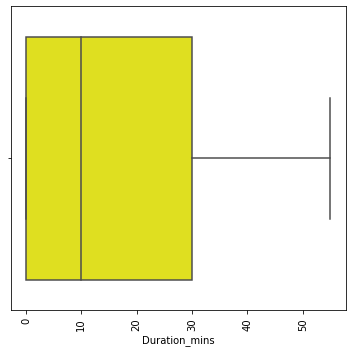

In [72]:
plt.figure(figsize=(5,5))
sns.boxplot(data['Duration_mins'],color='yellow')
plt.xticks(rotation=90)
plt.tight_layout()

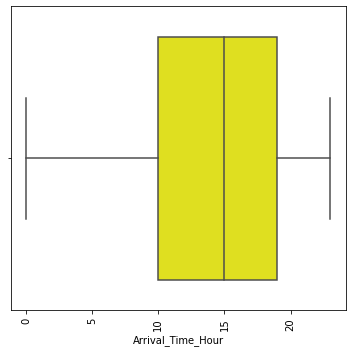

In [73]:
plt.figure(figsize=(5,5))
sns.boxplot(data['Arrival_Time_Hour'],color='yellow')
plt.xticks(rotation=90)
plt.tight_layout()

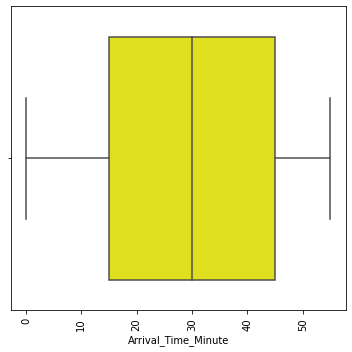

In [75]:
plt.figure(figsize=(5,5))
sns.boxplot(data['Arrival_Time_Minute'],color='yellow')
plt.xticks(rotation=90)
plt.tight_layout()

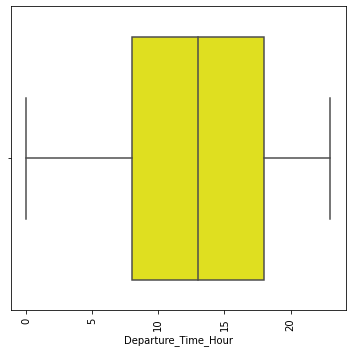

In [76]:
plt.figure(figsize=(5,5))
sns.boxplot(data['Departure_Time_Hour'],color='yellow')
plt.xticks(rotation=90)
plt.tight_layout()

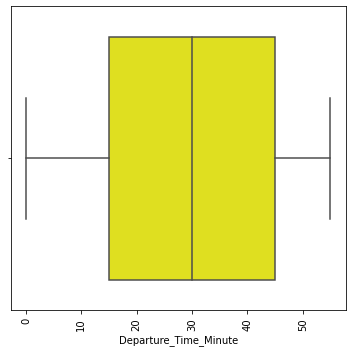

In [77]:
plt.figure(figsize=(5,5))
sns.boxplot(data['Departure_Time_Minute'],color='yellow')
plt.xticks(rotation=90)
plt.tight_layout()

## `Handling Outliers:`

In [79]:
from scipy.stats import zscore
z_score=zscore(data[['Journey_day','Duration_hours']])
abs_zscore=np.abs(z_score)

In [80]:
threshold=3
new_entry=(abs_zscore<threshold).all(axis=1)
df_new=data[new_entry]
print("The shape before: ", data.shape)
print("The shape after: ",df_new.shape)

The shape before:  (3434, 13)
The shape after:  (3420, 13)


# ` Data Loss:-`

In [81]:
loss=(3434-3420)/3434*100
print("for removing the  outliers our data loss is : ",round(loss,1),'%')

for removing the  outliers our data loss is :  0.4 %


The data loss is very less, Let's move ahead.

## `Checking Skewness:`

In [82]:
df_new.skew()

Price                    0.909019
Journey_day             -0.823785
Duration_hours           0.676072
Duration_mins            0.706888
Arrival_Time_Hour       -0.500681
Arrival_Time_Minute     -0.023261
Departure_Time_Hour     -0.031353
Departure_Time_Minute   -0.106391
dtype: float64

In [89]:
## Handling only continous type feature:
df_new.Duration_Thours=np.sqrt(df_new['Duration_hours'])
df_new.Duration_mins=np.sqrt(df_new['Duration_mins'])

                                      
                                      
print(df_new.skew())

Price                    0.909019
Journey_day             -0.823785
Duration_hours           0.676072
Duration_mins            0.177516
Arrival_Time_Hour       -0.500681
Arrival_Time_Minute     -0.023261
Departure_Time_Hour     -0.031353
Departure_Time_Minute   -0.106391
dtype: float64


## `Heatmap:-`

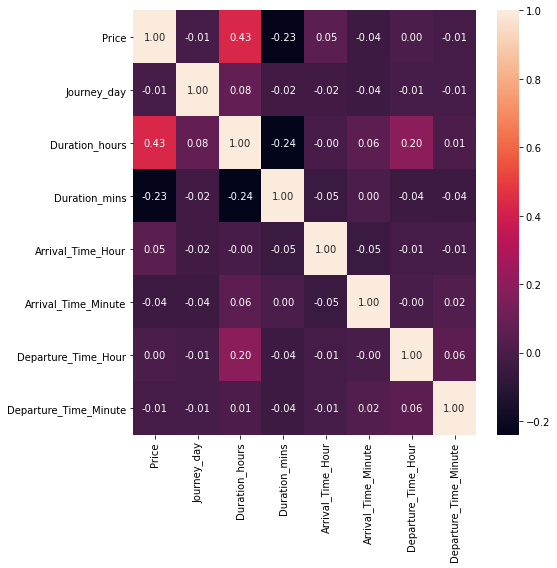

In [90]:
plt.figure(figsize=(8,8))
sns.heatmap(df_new.corr(),annot=True,
           linecolor='b',fmt='.2f')
plt.tight_layout()

### Observations:-
- `Duration_hours` are highest correlated with target variable.
- `Duration_mins` are second highest correlated with target variable.
- Rest of the features are very least correlated with target variable.

### Duration with Target:-

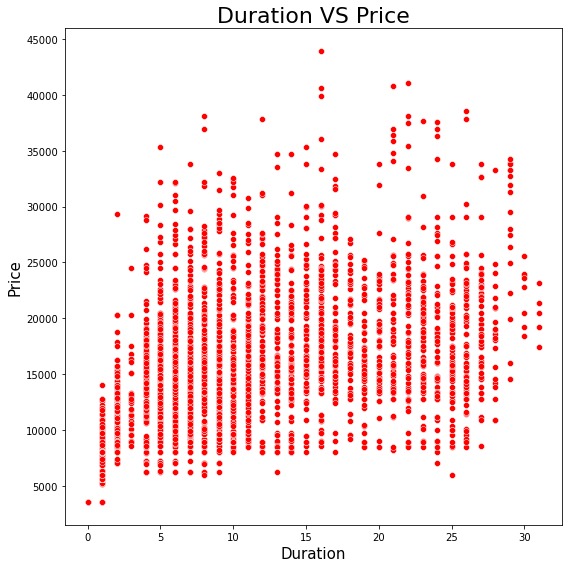

In [91]:
plt.figure(figsize=(8,8))
sns.scatterplot(df_new['Duration_hours'],df_new['Price'],color='r')
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title('Duration VS Price',fontsize=22)
plt.tight_layout()

## `Encoding:-`

In [92]:
data.head(5)

,Flight_name,Source,Destination,Total_stops,Website_name,Price,Journey_day,Duration_hours,Duration_mins,Arrival_Time_Hour,Arrival_Time_Minute,Departure_Time_Hour,Departure_Time_Minute
0,Indigo,Hyderabad,Chennai,Non-stop,EaseMyTrip.com,10987,30,1,0,22,5,21,5
1,Indigo,Hyderabad,Chennai,Non-stop,EaseMyTrip.com,6052,30,1,15,17,35,16,20
2,Indigo,Hyderabad,Chennai,Non-stop,EaseMyTrip.com,6052,30,1,15,20,15,19,0
3,Indigo,Hyderabad,Chennai,Non-stop,EaseMyTrip.com,9727,30,1,15,7,0,5,45
4,Indigo,Jaipur,Ahmedabad,Non-stop,EaseMyTrip.com,6371,30,1,15,11,15,10,0


we will use pd.get dummies for categorical data:-

In [93]:
df1=pd.get_dummies(df_new[['Flight_name','Source','Destination','Total_stops','Website_name']])
print(df1.shape)
df1.head(10)

(3420, 51)


,Flight_name_Air Asia,Flight_name_Air India,Flight_name_GO FIRST,Flight_name_Go First,Flight_name_IndiGo,Flight_name_Indigo,Flight_name_Multi-Airline,Flight_name_SpiceJet,Flight_name_Vistara,Source_Ahmedabad,Source_Amritsar,Source_Bangalore,Source_Banglore,Source_Chennai,Source_Delhi,Source_Guwahati,Source_Hyderabad,Source_Jaipur,Source_Kochi,Source_Kolkata,Source_Lucknow,Source_Mumbai,Source_New Delhi,Source_Srinagar,Destination_Ahmedabad,Destination_Bangalore,Destination_Banglore,Destination_Bengaluru,Destination_Chennai,Destination_Delhi,Destination_Goa,Destination_Goa In,Destination_Guwahati,Destination_Hyderabad,Destination_Jaipur,Destination_Kochi,Destination_Kolkata,Destination_Kozhikode,Destination_Mumbai,Destination_Nagpur,Destination_New Delhi,Destination_Srinagar,Total_stops_1-stop,Total_stops_2-stops,Total_stops_3-stops,Total_stops_Non-stop,Website_name_EaseMyTrip.com,Website_name_Flipkart.com,Website_name_Yatra.com,Website_name_goibibo.com,Website_name_travolook.com
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0


In [95]:
### merge the dataframe and dropping unwanted columns:
df=df_new.join(df1)
df.drop(columns=['Flight_name','Source','Destination','Total_stops','Website_name'],inplace=True)
df.head()

,Price,Journey_day,Duration_hours,Duration_mins,Arrival_Time_Hour,Arrival_Time_Minute,Departure_Time_Hour,Departure_Time_Minute,Flight_name_Air Asia,Flight_name_Air India,Flight_name_GO FIRST,Flight_name_Go First,Flight_name_IndiGo,Flight_name_Indigo,Flight_name_Multi-Airline,Flight_name_SpiceJet,Flight_name_Vistara,Source_Ahmedabad,Source_Amritsar,Source_Bangalore,Source_Banglore,Source_Chennai,Source_Delhi,Source_Guwahati,Source_Hyderabad,Source_Jaipur,Source_Kochi,Source_Kolkata,Source_Lucknow,Source_Mumbai,Source_New Delhi,Source_Srinagar,Destination_Ahmedabad,Destination_Bangalore,Destination_Banglore,Destination_Bengaluru,Destination_Chennai,Destination_Delhi,Destination_Goa,Destination_Goa In,Destination_Guwahati,Destination_Hyderabad,Destination_Jaipur,Destination_Kochi,Destination_Kolkata,Destination_Kozhikode,Destination_Mumbai,Destination_Nagpur,Destination_New Delhi,Destination_Srinagar,Total_stops_1-stop,Total_stops_2-stops,Total_stops_3-stops,Total_stops_Non-stop,Website_name_EaseMyTrip.com,Website_name_Flipkart.com,Website_name_Yatra.com,Website_name_goibibo.com,Website_name_travolook.com
0,10987,30,1,0.000000,22,5,21,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,6052,30,1,3.872983,17,35,16,20,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,6052,30,1,3.872983,20,15,19,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,9727,30,1,3.872983,7,0,5,45,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,6371,30,1,3.872983,11,15,10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [96]:
df.shape

(3420, 59)

## `Correlation With Target:-`

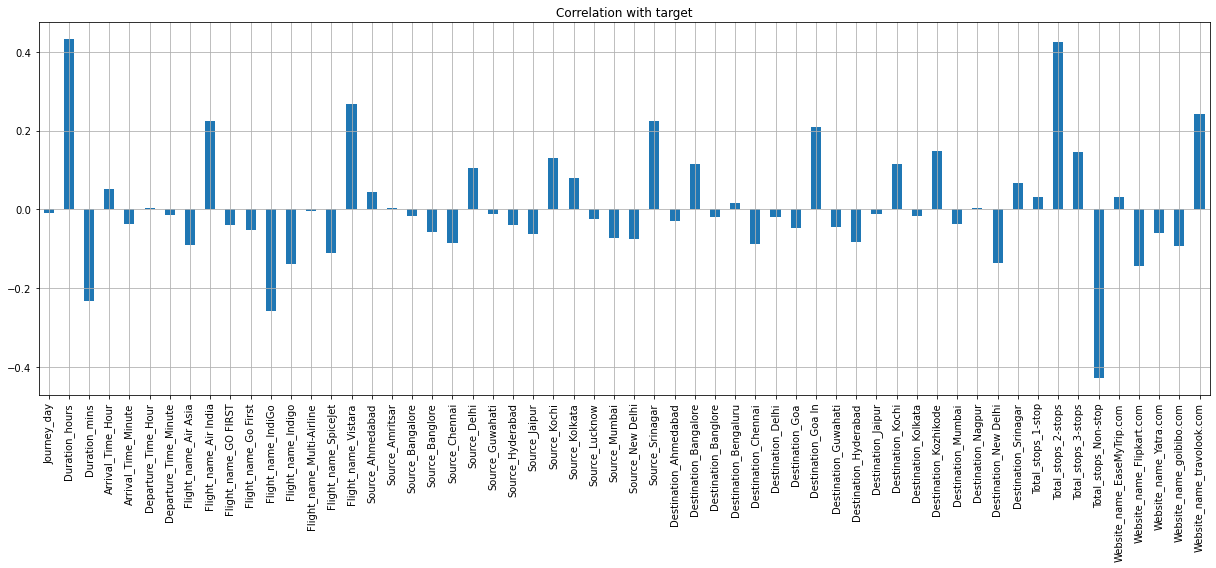

In [97]:
df.drop('Price',axis=1).corrwith(df.Price).plot(kind='bar',grid=True,figsize=(17,8),title='Correlation with target')
plt.tight_layout()

## Observations of above correlation:-
- 'Duration_hours','Duration_mins','Flight_name_Air_India','Flight_name_Vistara','Source_Srinagar','Total-stops_non_stops',and 'Website_name_travaolook.com'are highly correlated with target variable.
- 'Journey-day','Departure-Time_Hour','Flight_name_multi-Airline','Source_Amritsar','Destination_nagpur' are very less correalted with target variable.
We will use feature selection technique to select best feature:-

## `Scalling:-`

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [99]:
### splitting the dataset:-
x=df.drop('Price',axis=1)
y=df.Price

In [101]:
## scaling
for i in x.columns:
    x[i]=scaler.fit_transform(x[i].values.reshape(-1,1))
x.head(10)

,Journey_day,Duration_hours,Duration_mins,Arrival_Time_Hour,Arrival_Time_Minute,Departure_Time_Hour,Departure_Time_Minute,Flight_name_Air Asia,Flight_name_Air India,Flight_name_GO FIRST,Flight_name_Go First,Flight_name_IndiGo,Flight_name_Indigo,Flight_name_Multi-Airline,Flight_name_SpiceJet,Flight_name_Vistara,Source_Ahmedabad,Source_Amritsar,Source_Bangalore,Source_Banglore,Source_Chennai,Source_Delhi,Source_Guwahati,Source_Hyderabad,Source_Jaipur,Source_Kochi,Source_Kolkata,Source_Lucknow,Source_Mumbai,Source_New Delhi,Source_Srinagar,Destination_Ahmedabad,Destination_Bangalore,Destination_Banglore,Destination_Bengaluru,Destination_Chennai,Destination_Delhi,Destination_Goa,Destination_Goa In,Destination_Guwahati,Destination_Hyderabad,Destination_Jaipur,Destination_Kochi,Destination_Kolkata,Destination_Kozhikode,Destination_Mumbai,Destination_Nagpur,Destination_New Delhi,Destination_Srinagar,Total_stops_1-stop,Total_stops_2-stops,Total_stops_3-stops,Total_stops_Non-stop,Website_name_EaseMyTrip.com,Website_name_Flipkart.com,Website_name_Yatra.com,Website_name_goibibo.com,Website_name_travolook.com
0,0.666667,0.032258,0.000000,0.956522,0.090909,0.913043,0.090909,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.666667,0.032258,0.522233,0.739130,0.636364,0.695652,0.363636,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.666667,0.032258,0.522233,0.869565,0.272727,0.826087,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.666667,0.032258,0.522233,0.304348,0.000000,0.217391,0.818182,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.666667,0.032258,0.522233,0.478261,0.272727,0.434783,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5,0.666667,0.032258,0.603023,0.826087,0.272727,0.739130,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
6,0.666667,0.032258,0.603023,0.478261,0.454545,0.434783,0.090909,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7,0.666667,0.032258,0.603023,0.695652,0.363636,0.652174,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8,0.666667,0.032258,0.603023,0.304348,0.363636,0.260870,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9,0.666667,0.032258,0.674200,0.695652,0.090909,0.608696,0.727273,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [102]:
x.dtypes

Journey_day                    float64
Duration_hours                 float64
Duration_mins                  float64
Arrival_Time_Hour              float64
Arrival_Time_Minute            float64
Departure_Time_Hour            float64
Departure_Time_Minute          float64
Flight_name_Air Asia           float64
Flight_name_Air India          float64
Flight_name_GO FIRST           float64
Flight_name_Go First           float64
Flight_name_IndiGo             float64
Flight_name_Indigo             float64
Flight_name_Multi-Airline      float64
Flight_name_SpiceJet           float64
Flight_name_Vistara            float64
Source_Ahmedabad               float64
Source_Amritsar                float64
Source_Bangalore               float64
Source_Banglore                float64
Source_Chennai                 float64
Source_Delhi                   float64
Source_Guwahati                float64
Source_Hyderabad               float64
Source_Jaipur                  float64
Source_Kochi             

## `PCA:-`

In [103]:
from sklearn.decomposition import PCA
pca=PCA()

In [104]:
pca.fit_transform(x)

array([[-4.17440748e-01,  8.28338140e-01,  9.48665054e-01, ...,
         1.46987179e-16, -3.98703634e-17, -3.40154765e-17],
       [-2.67280865e-01,  9.01165781e-01,  8.77353520e-01, ...,
         1.36476521e-16, -5.77204359e-16,  2.11008172e-16],
       [-2.52896486e-01,  9.21805496e-01,  9.07153835e-01, ...,
         4.68441792e-17, -1.82467547e-16,  1.91363561e-17],
       ...,
       [ 3.57964156e-01, -4.81310442e-01, -2.62951119e-01, ...,
        -2.55298668e-17, -1.29928760e-17,  2.28882837e-17],
       [-4.34343492e-01,  6.51445309e-01, -6.89940038e-01, ...,
        -1.45004444e-17,  4.24514047e-18,  3.28938794e-18],
       [-2.99663177e-01,  5.03868816e-01, -6.77427933e-01, ...,
        -7.17127888e-18, -3.56104713e-18,  8.24929347e-18]])

## Plotting the scree plot:

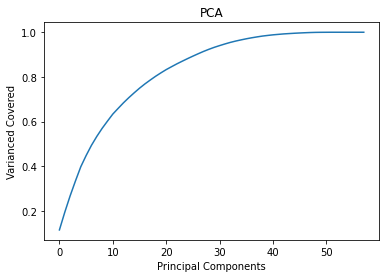

In [105]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Varianced Covered')
plt.title('PCA')
plt.show()

we can see 35 Principal components are able to explain our data more than 95%. Hence we will take only 35 components.

In [107]:
pca=PCA(n_components=35)
new_comp=pca.fit_transform(x)
x_comp=pd.DataFrame(new_comp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
                                     'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
                                      'PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30',
                                     'PC31','PC32','PC33','PC34','PC35'])
x_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35
0,-0.417441,0.828338,0.948665,-0.320994,0.637881,0.163929,0.393662,0.277286,0.501755,-0.672958,0.310441,-0.635682,0.718432,0.007805,0.588190,0.527067,0.115518,0.017006,0.347555,0.162303,0.089776,0.563071,0.056134,-0.004751,0.020355,-0.365999,-0.283652,-0.435136,-0.047411,-0.213923,-0.202550,0.076074,0.050254,-0.105934,0.014306
1,-0.267281,0.901166,0.877354,-0.285828,0.583356,-0.030310,0.455518,0.237172,0.601156,-0.606756,-0.003949,-0.653642,0.952800,-0.010552,0.081518,0.393236,0.028573,-0.143314,0.309379,0.167470,0.059069,0.263255,-0.050410,0.201046,-0.023073,-0.343137,-0.244318,-0.313883,-0.008312,-0.212036,-0.209015,-0.008330,-0.018636,-0.149401,0.003775
2,-0.252896,0.921805,0.907154,-0.314162,0.561347,0.060662,0.416086,0.267342,0.641168,-0.653235,0.065096,-0.707803,0.719617,0.173254,0.409728,0.517554,0.172412,-0.117088,0.371855,0.157094,0.064689,0.400268,-0.057345,0.186337,0.063591,-0.358227,-0.334297,-0.307301,-0.009621,-0.216939,-0.215324,0.022067,-0.002076,-0.148431,0.000594
3,-0.254694,0.942441,0.915812,-0.339527,0.574247,-0.131842,0.415521,0.245239,0.520737,-0.634787,0.130565,-0.378392,0.783681,-0.333199,0.235649,0.808719,-0.149995,-0.213315,0.507959,-0.016701,0.294387,-0.277111,0.057282,0.206229,-0.327896,-0.303803,-0.139135,-0.315806,-0.016096,-0.217528,-0.182345,-0.026093,-0.032027,-0.145213,-0.001767
4,-0.253515,0.979382,0.901244,-0.367183,0.529781,-0.083953,0.189649,0.315742,0.347504,-0.125415,-0.100205,-0.416383,0.148987,0.131540,0.445082,-0.041497,0.082776,-0.272989,0.564711,-0.122016,0.019697,0.026815,-0.254214,-0.000328,-0.185179,-0.398719,-0.144072,-0.242986,0.042595,0.098022,-0.324685,-0.191857,-0.306694,0.607662,0.191344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3415,0.554985,-0.642429,0.073455,0.523519,-0.364278,-0.332081,0.599483,0.501236,0.665908,-0.384966,-0.309169,0.141432,-0.084401,0.615374,0.003392,-0.624910,0.084650,0.084346,0.084303,0.016061,-0.300203,-0.337764,-0.376820,-0.176753,0.048551,0.276106,0.204073,0.244277,-0.060100,-0.008713,-0.174945,-0.082730,-0.012107,-0.069161,-0.132029
3416,0.702110,0.107423,-0.479759,-0.387900,-0.511344,-0.079420,1.054224,-0.469224,-0.060447,0.536340,0.156348,0.237091,-0.177709,0.065828,-0.220417,0.110672,-0.076852,-0.039642,-0.187838,0.280344,-0.187132,0.087908,-0.385821,0.339126,-0.139420,-0.016557,-0.168080,-0.072469,-0.169239,-0.007188,0.064995,0.153263,-0.062146,0.026427,0.064396
3417,0.357964,-0.481310,-0.262951,0.578915,-0.316309,-0.153614,0.852674,-0.413866,0.325950,0.092444,-0.439431,-0.023585,-0.444289,-0.361554,-0.337462,0.098623,-0.291004,-0.364661,0.013375,-0.362569,0.025586,0.325139,-0.145779,0.121813,0.029256,-0.437788,0.189366,0.086000,0.515740,0.070282,-0.212946,-0.155532,-0.030822,-0.097805,-0.238966
3418,-0.434343,0.651445,-0.689940,-0.204181,0.498954,0.169771,0.219205,0.670505,-0.780079,-0.190093,0.500750,0.127469,-0.055832,0.043662,0.227943,-0.195787,0.179265,-0.170507,-0.393207,0.314893,0.014467,-0.349531,0.089491,0.388012,0.478328,0.072307,-0.379969,0.209047,0.316707,0.078479,0.133437,-0.347851,-0.279546,-0.115435,0.257118


## Building The Model:-

as it is a regression model so we will import regression models:

Importing the models:-

In [112]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
### importing ensemble  models

from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

### import metrics

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

In [109]:
### importing train test
from sklearn.model_selection import train_test_split as tts

## Define a Function for Best Random State:
We will use LinearRegression for finding the best random state.

In [129]:
def random_state(feature,target):
    max_r2=0
    for i in range(1,51):
        x_train,x_test,y_train,y_test=tts(feature,target,test_size=0.20,random_state=i)
        lr=LinearRegression()
        lr.fit(x_train,y_train)
        pred=lr.predict(x_test)
        score=r2_score(y_test,pred)
        if score>max_r2:
            max_r2=score
           
    return i

In [122]:
## Creating a list having all models:
all_model=[LinearRegression(),KNeighborsRegressor(),RandomForestRegressor(), AdaBoostRegressor(),
           GradientBoostingRegressor(),DecisionTreeRegressor(),SVR(),XGBRegressor(),Lasso(),Ridge()]
model_name=['linear regression','k-nearest neighbors','random forest','adaboost','gradientboosting','decisiontree',
            'svr','xgb','lasso','ridge']

### importing cross validation
from sklearn.model_selection import cross_val_score

## Define a Function for Model_Building;

In [123]:

def model_building(Models,Features,Target,n):
    x_train,x_test,y_train,y_test=tts(Features,Target,test_size=0.2,random_state=random_state(Features,Target))
    ## creating the empty list
    number=[]
    Mae=[]
    Mse=[]
    Smse=[]
    r2=[]
    MeanCV=[]
    ## building the model
    for i , j in enumerate(Models):
        j.fit(x_train,y_train)
        pred_test=j.predict(x_test)
        ## choosing cv=5
        
        
        
        score=cross_val_score(j,x_train,y_train,cv=5,scoring='r2')
        
        # appending the score with their respective list
        number.append(n[i])
        Mae.append(np.round(MAE(y_test,pred_test),3))
        Mse.append(np.round(MSE(y_test,pred_test),3))
        Smse.append(np.round(np.sqrt(MSE(y_test,pred_test)),3))
        r2.append(np.round(r2_score(y_test,pred_test),2))
        MeanCV.append(np.round(np.mean(score),4))
        
    ## make a dataframe to understand in a better way
    dataframe=pd.DataFrame()
    dataframe['Model_name']=number
    dataframe['Mean Absolute error']=Mae
    dataframe['Mean Squared error']=Mse
    dataframe['SquareRoot of Mean Squared error']=Smse
    dataframe["Model's R2 Score "]=r2
    dataframe['Mean of the Cross Validation']=MeanCV
    dataframe.set_index('Model_name',inplace=True)
    return dataframe

# Printing the All Models Score:
## `Without Using PCA the All Model's Performance`

In [124]:
model_building(all_model,x,y,model_name)

,Mean Absolute error,Mean Squared error,SquareRoot of Mean Squared error,Model's R2 Score,Mean of the Cross Validation
Model_name,,,,,
linear regression,2812.194,1.504009e+07,3878.156,0.56,-9.408375e+20
k-nearest neighbors,2243.050,1.231058e+07,3508.643,0.64,5.930000e-01
random forest,2065.629,9.820627e+06,3133.788,0.71,6.588000e-01
adaboost,4339.378,2.637323e+07,5135.488,0.22,3.029000e-01
gradientboosting,2440.354,1.177156e+07,3430.970,0.65,6.029000e-01
decisiontree,2592.201,1.844121e+07,4294.323,0.45,4.358000e-01
svr,4417.877,3.391420e+07,5823.590,-0.00,-9.800000e-03
xgb,2141.306,9.583205e+06,3095.675,0.72,6.436000e-01
lasso,2807.133,1.497571e+07,3869.846,0.56,5.430000e-01


## `With Using PCA the All Model's Performance`

In [130]:
model_building(all_model,x_comp,y,model_name)

,Mean Absolute error,Mean Squared error,SquareRoot of Mean Squared error,Model's R2 Score,Mean of the Cross Validation
Model_name,,,,,
linear regression,2927.369,1.527880e+07,3908.810,0.54,0.5084
k-nearest neighbors,2203.189,1.189835e+07,3449.399,0.64,0.6086
random forest,2175.424,1.076267e+07,3280.651,0.68,0.6336
adaboost,3872.207,2.229439e+07,4721.694,0.33,0.3367
gradientboosting,2580.509,1.272830e+07,3567.674,0.62,0.5860
decisiontree,2776.181,2.009894e+07,4483.184,0.40,0.2570
svr,4434.646,3.345370e+07,5783.917,-0.01,-0.0138
xgb,2297.610,1.199743e+07,3463.731,0.64,0.5797
lasso,2926.783,1.527081e+07,3907.788,0.54,0.5085


## `Conclusion:`
As we can see that Without using PCA our models are performing very well. 

## `RandomForestRegressor` and `XGBRegressor` give us  the Best Accuracy.

## `HyperParaMeterTunning:`

In [131]:
random_state(x,y)

50

In [132]:
## importing required libraries:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [155]:
##for random forest
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.20,random_state=50)
RandomForestRegressor().fit(x_train,y_train)

RandomForestRegressor()

In [135]:
param={'n_estimators':[50,100,200,300],
      'min_samples_split':[1,2,3,4],
      'min_samples_leaf':[2,3,4],
      'max_depth':[3,4,5,6,7,8]}

gridsearch=GridSearchCV(RandomForestRegressor(),param,cv=5,n_jobs=-1)

gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [50, 100, 200, 300]})

In [136]:
print(gridsearch.best_params_)

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50}


## `Model Evaluation For Random Forest`

In [157]:
rf=RandomForestRegressor(n_estimators=100,min_samples_split=3,min_samples_leaf=2,,max_depth=8)
rf.fit(x_train,y_train)
rf.predict(x_train)
y_pred=rf.predict(x_test)
score=r2_score(y_test,y_pred)
print("\nRandom Forest Regressor R2 Score is : ",score)
print("\nMean Squared Erros is : ",MSE(y_test,y_pred))
print("\nMean Abosute Erros is : ",MAE(y_test,y_pred))
print("\nRoot Mean Squared Error is: ",np.sqrt(MSE(y_test,y_pred)))


Random Forest Regressor R2 Score is :  0.7073356666094661

Mean Squared Erros is :  9727760.456666946

Mean Abosute Erros is :  2011.3886012611088

Root Mean Squared Error is:  3118.9357891221402


Text(0.5, 1.0, 'Random Forest Model prediction')

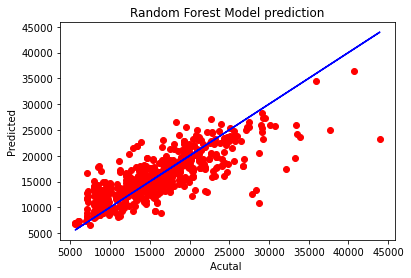

In [144]:
## plotting graph
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Acutal ')
plt.ylabel('Predicted')
plt.title('Random Forest Model prediction')

## `Hyperparameter tunning for XGB Regressor`

In [158]:
x_train,x_test,y_train,y_test=tts(x,y, test_size=0.25,random_state=100)
grid_param={'learning_rate':[0.0001,0.001,0.01,0.1,1],
           'gamma':[0.1,0.001,0.2,0.3,0.4,0.5,0.6,0.7],
           'colsample_bytree':[0.3,0.5,0.7]}

In [146]:
Gcv=GridSearchCV(XGBRegressor(),grid_param,cv=5,n_jobs=-1)
Gcv.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [147]:
Gcv.best_params_

{'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1}

## `Model Evaluation of XGB Regressor`

In [173]:
xgb=XGBRegressor(colsample_bytree=0.6,gamma=0.1,learning_rate=0.1)
xgb.fit(x_train,y_train)
xgb.predict(x_train)
pred_y=xgb.predict(x_test)
score=r2_score(y_test,pred_y)
print("\nRandom Forest Regressor R2 Score is : ",score)
print("\nMean Squared Erros is : ",MSE(y_test,pred_y))
print("\nMean Abosute Erros is : ",MAE(y_test,pred_y))
print("\nRoot Mean Squared Error is: ",np.sqrt(MSE(y_test,pred_y)))


Random Forest Regressor R2 Score is :  0.7218376742432178

Mean Squared Erros is :  9534698.315718545

Mean Abosute Erros is :  2109.7378917671786

Root Mean Squared Error is:  3087.8306811932785


Text(0.5, 1.0, 'XGB Model prediction')

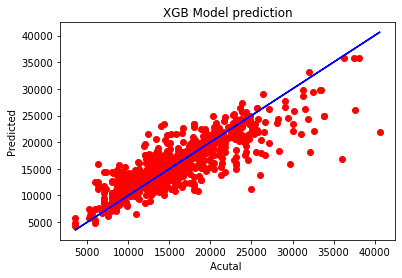

In [174]:
## plotting graph
plt.scatter(x=y_test,y=pred_y,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Acutal ')
plt.ylabel('Predicted')
plt.title('XGB Model prediction')

## `Best Fit Model`

As we can see that XGB Regressor Model gives us the best accuracy. So we will finalized this as a best fit model.
#### finding the best random state for xgb:

In [175]:
def random_state(feature,target):
    max_r2=0
    for i in range(1,101):
        x_train,x_test,y_train,y_test=tts(feature,target,test_size=0.20,random_state=i)
        lr=XGBRegressor()
        lr.fit(x_train,y_train)
        pred=lr.predict(x_test)
        score=r2_score(y_test,pred)
        if score>max_r2:
            max_r2=score
           
    return i

In [176]:
random_state(x,y)

100

In [180]:
x_train,x_test,y_train,y_test=tts(x,y, test_size=0.25,random_state=100)

In [181]:
xgb=XGBRegressor(colsample_bytree=0.6,gamma=0.1,learning_rate=0.1)
xgb.fit(x_train,y_train)
xgb.predict(x_train)
pred_y=xgb.predict(x_test)
score=r2_score(y_test,pred_y)

In [182]:
## printing the scores
print("\nXGB Regressor R2 Score is : ",score)
print("\nMean Squared Erros is : ",MSE(y_test,pred_y))
print("\nMean Abosute Erros is : ",MAE(y_test,pred_y))
print("\nRoot Mean Squared Error is: ",np.sqrt(MSE(y_test,pred_y)))


XGB Regressor R2 Score is :  0.7218376742432178

Mean Squared Erros is :  9534698.315718545

Mean Abosute Erros is :  2109.7378917671786

Root Mean Squared Error is:  3087.8306811932785


## `Actual VS Predicted`

In [183]:
original=np.array(y_test)
predicted=np.array(xgb.predict(x_test))
compare=pd.DataFrame({'Actual':original,'Predicted':predicted},index=range(len(original)))
compare

,Actual,Predicted
0,18830,17381.072266
1,8489,10947.279297
2,8837,8345.750000
3,18016,22922.349609
4,14881,13931.017578
...,...,...
850,11981,13452.754883
851,11099,13260.461914
852,21023,18573.585938
853,26521,21908.449219


## Conclusion:-
#### `The bigger the data, better the model:`